# STO-3G Basis

There are 2 hydrogen atom. In every step, the distance between these 2 H atom is increasing by `bond_length_interval`. Then, we calculate the `Hartree-Fock, FCI energies` by using the builtin functions of `Moleculer Data` class in `STO-3G basis`.

https://quantumai.google/openfermion/tutorials/intro_to_openfermion#basics_of_moleculardata_class

In [1]:
from openfermion.chem import MolecularData

In [2]:
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.1
n_points = 25

hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(3, n_points + 1):
    bond_length = bond_length_interval * point
    bond_lengths += [bond_length]
    description = str(round(bond_length,2))

    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]

    molecule = MolecularData(geometry, basis, multiplicity, description=description)

    molecule.load()

    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]


Plotting the energies

In [3]:
import matplotlib.pyplot as plt

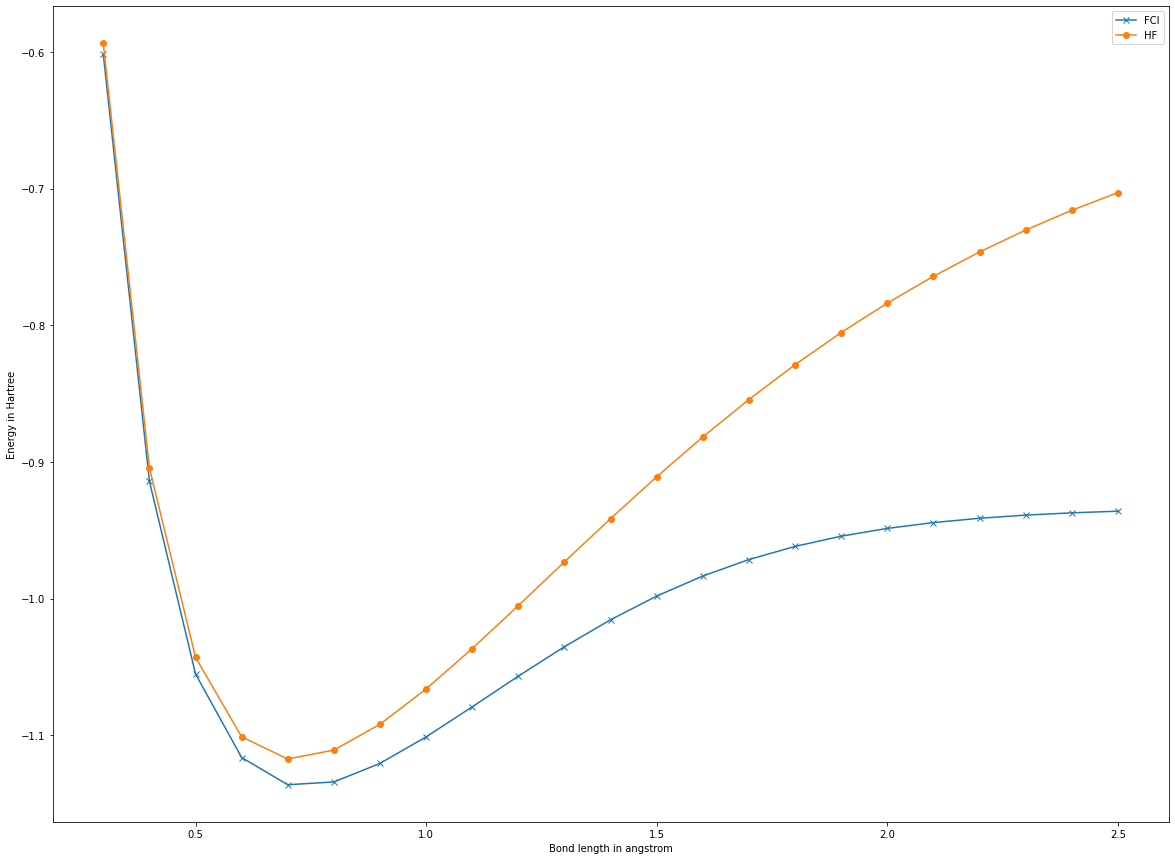

In [4]:
plt.figure(0,figsize=(20,15))
plt.plot(bond_lengths, fci_energies, 'x-',label="FCI")
plt.plot(bond_lengths, hf_energies, 'o-',label="HF")
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()